In [212]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [213]:
class Particle():    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id): 
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - 0.9* self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - 0.9*self.v[i]
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]])
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [214]:
# Discretization
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)
r0 = np.array([-15., 5.])
v0 = np.array([1., 0.])
a = np.array([0., -9.8])
r=1
Limits = np.array([20.,20.])

In [215]:
def RunSimulation(t): 
    P= Particle(r0,v0,a,t,1.,r,1.)
    for it in tqdm(range(len(t))): # Evolucion temporal
        P.CheckWallLimits(Limits)
        P.Evolution(it)
    return P
P= RunSimulation(t)

100%|██████████| 3001/3001 [00:00<00:00, 50048.73it/s]


In [216]:
def ReduceTime(t,factor):
    P.ReduceSize(factor)
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
    return np.array(Newt)

redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


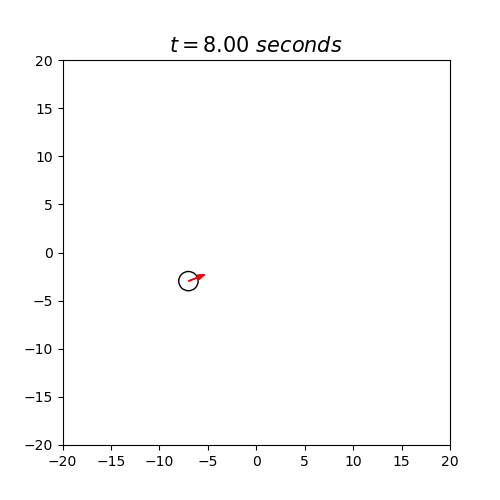

In [217]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    x = P.GetRPositionVector()[i,0]
    y = P.GetRPositionVector()[i,1]
        
    vx = P.GetRVelocityVector()[i,0]
    vy = P.GetRVelocityVector()[i,1]
        
    circle = plt.Circle( (x,y), P.GetR(), color='k', fill=False)
    plot = ax.add_patch(circle)
    plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

<IPython.core.display.Javascript object>


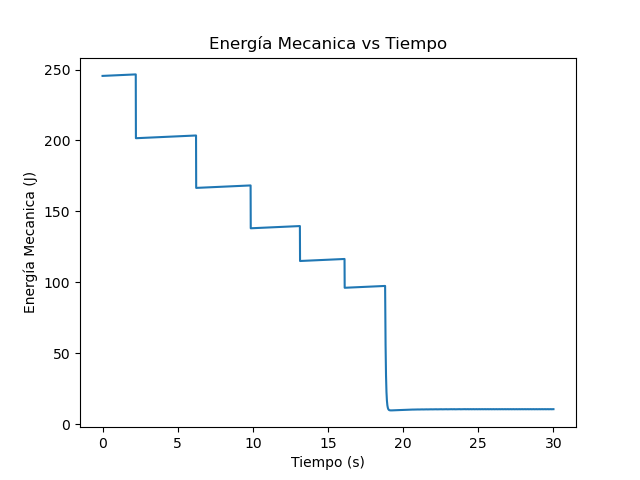

Text(0.5, 1.0, 'Energía Mecanica vs Tiempo')

In [221]:
#Writer = anim.writers['ffmpeg']
#writer_ = Writer(fps=1000, metadata=dict(artist='Me'))
#Animation.save('FallingBall.mp4', writer=writer_)
ME=0.5*1*((P.GetVelocityVector()[:,0]**2)+(P.GetVelocityVector()[:,1]**2)) +1*9.8*abs(P.GetPositionVector()[:,1]+20)
plt.plot(t,ME)
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía Mecanica (J)")
plt.title("Energía Mecanica vs Tiempo")